# Inception

To shrink width and height, pool or convolution is used.

To shrink depth, 1x1 convolution is used.

It saves on computation task, also adds non linearity and allows to learn more complex functions.

Inception is a very deep classifier. As with any deep networks it is subjected to vanishing gradient problem. To prevent the middle part of network from dying out , it has 2 **auxiliary classifiers** . They essentially applied softmax to outputs of 2 of inception modules, and computed auxiliary loss over the same labels. The total loss function is weighted sum of auxiliary loss and real loss. 

### Code implementation

In [1]:
from keras.layers import *

In [2]:
input=Input(shape=(32,32,3))

In [4]:
tower_1=Conv2D(64,(1,1),padding='same',activation='relu')(input)
tower_1=Conv2D(64,(3,3),padding='same',activation='relu')(tower_1)

tower_2=Conv2D(64,(1,1),padding='same',activation='relu')(input)
tower_2=Conv2D(64,(5,5),padding='same',activation='relu')(tower_2)

tower_3=MaxPooling2D((3,3),padding='same',strides=(1,1))(input)
tower_3=Conv2D(64,(3,3),padding='same',activation='relu')(tower_3)

In [8]:
import keras
output=keras.layers.concatenate([tower_1,tower_2,tower_3],axis=3)

In [9]:
flat=Flatten()(output)
final=Dense(10,activation='softmax')(flat)

In [10]:
from keras.models import Model
model=Model(inputs=input,outputs=final)

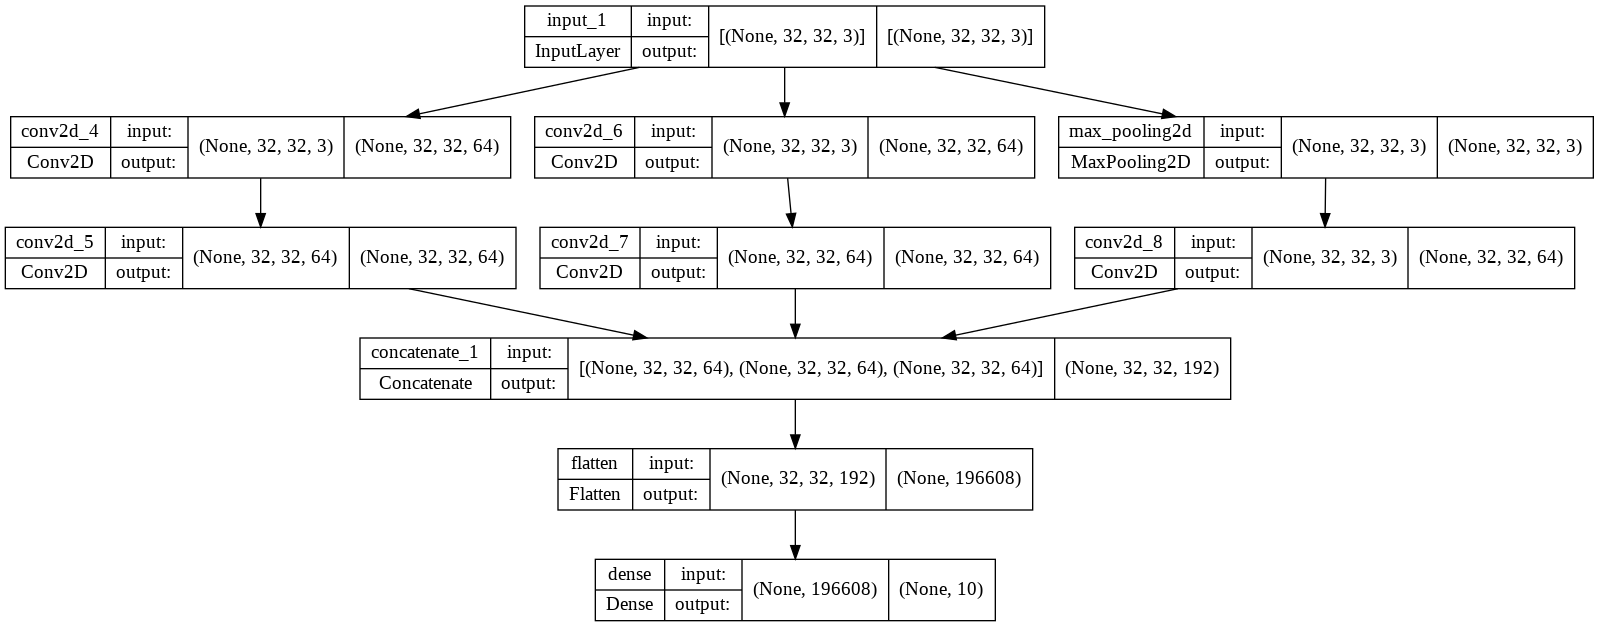

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 32, 32, 64)   256         ['input_1[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 64)   256         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 3)    0           ['input_1[0][0]']                
                                                                                              